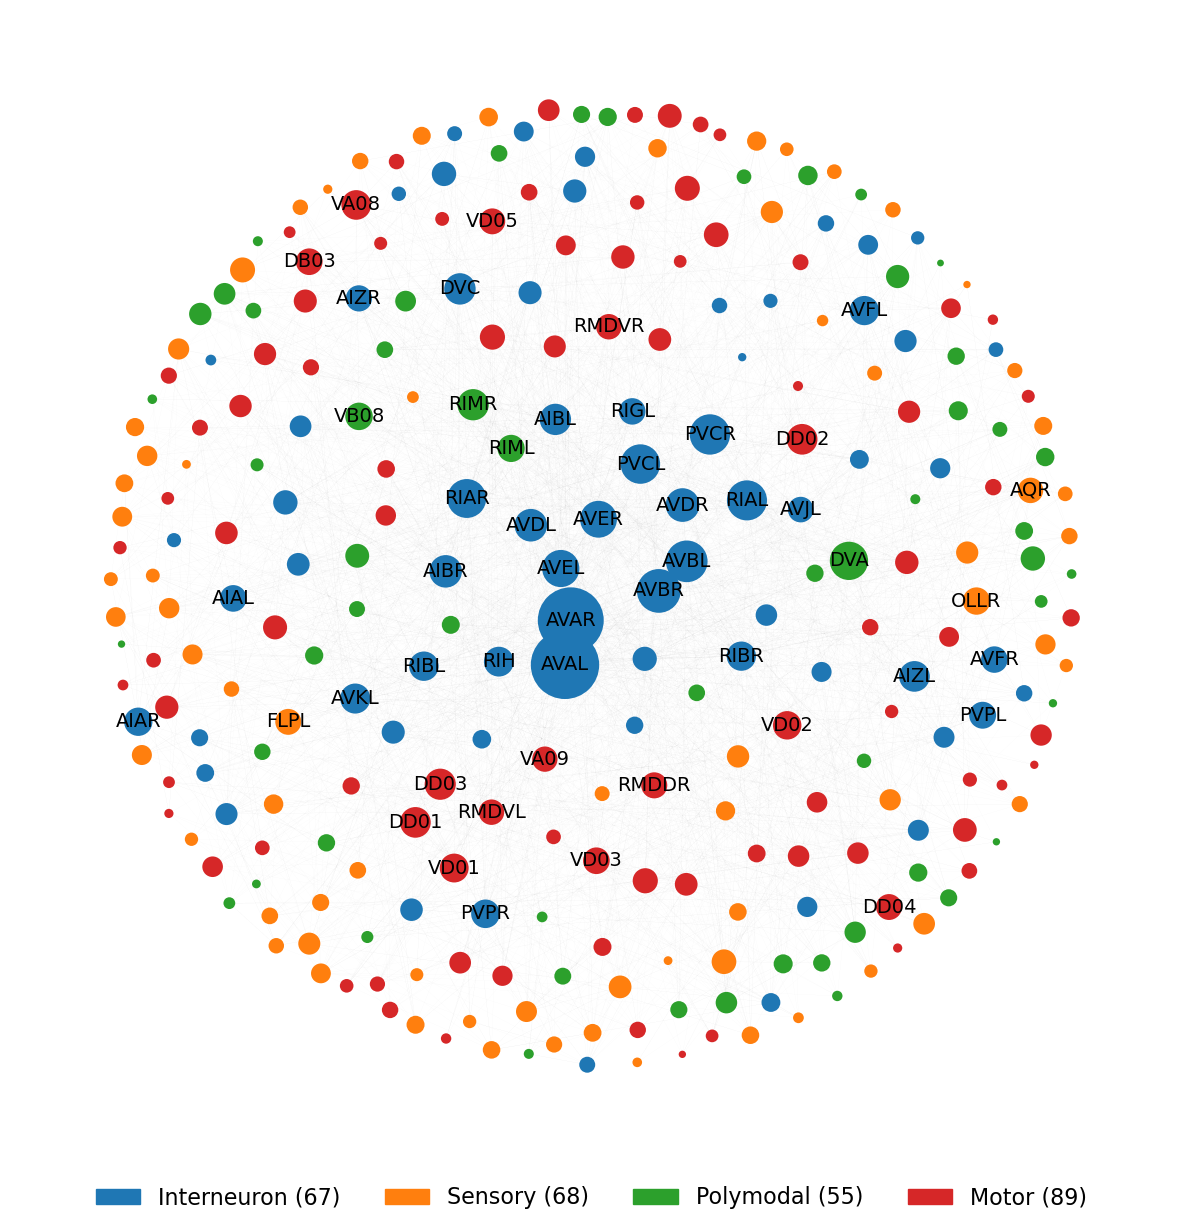

In [9]:
import scipy.io as sio
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
# =============================
# Load Data
# =============================
data1 = sio.loadmat('C_Elegans_Network_Data.mat')
data2 = sio.loadmat('Worm279dir.mat')

Gap_Junction = data1['Gap_Junction']  # 279x279 weighted matrix (undirected)
Synapse = data1['Synapse']            # 279x279 directed matrix

Worm279_labelled = data2['Worm279_labelled']

# Extract neuron labels and classes
labels = [str(l[0]) for l in Worm279_labelled[:, 0]]
classes = [str(c[0]) for c in Worm279_labelled[:, 1]]

# Count neurons in each class
class_counts = {}
for c in classes:
    class_counts[c] = class_counts.get(c, 0) + 1

# =============================
# Build Graph
# =============================
G = nx.DiGraph()

for i in range(len(labels)):
    # Degree contributions
    gap_degree = np.sum(Gap_Junction[i, :]) + np.sum(Gap_Junction[:, i])
    syn_in = np.sum(Synapse[:, i])
    syn_out = np.sum(Synapse[i, :])
    total_degree = gap_degree + syn_in + syn_out

    G.add_node(
        i,
        label=labels[i],
        neuron_class=classes[i],
        size=total_degree
    )

# Add edges from Gap Junctions (undirected, weighted)
for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        w = Gap_Junction[i, j] + Gap_Junction[j, i]
        if w > 0:
            G.add_edge(i, j, weight=w)
            G.add_edge(j, i, weight=w)

# Add edges from Synapses (directed, weighted)
for i in range(len(labels)):
    for j in range(len(labels)):
        w = Synapse[i, j]
        if w > 0:
            G.add_edge(i, j, weight=w)

# =============================
# Node Color Mapping
# =============================
unique_classes = list(set(classes))
#color_map = {c: plt.cm.Dark2(i % 10) for i, c in enumerate(unique_classes)}
color_map = {c: plt.cm.tab10(i % 8) for i, c in enumerate(unique_classes)}

#tab20 = plt.cm.tab20.colors
#light_colors = tab20[1::2]   # pick only light tones
#color_map = {c: light_colors[i % len(light_colors)] for i, c in enumerate(unique_classes)}

node_colors = [color_map[G.nodes[n]['neuron_class']] for n in G.nodes()]

sizes = np.array([G.nodes[n]['size'] for n in G.nodes()])
# Node sizes (scaled)
node_sizes = [G.nodes[n]['size'] * 4 for n in G.nodes()]

# Get indices of top 20 connected neurons
top20_nodes = np.argsort(sizes)[-50:]  # last 20 are largest

# Create a labels dictionary only for these nodes
top_labels = {n: G.nodes[n]['label'] for n in top20_nodes}

# =============================
# Layout and Draw
# =============================
#pos = nx.spring_layout(G, k=5, iterations=200)
pos = nx.arf_layout(G)

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=1, edgecolors="none")
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.05, arrows=False)
#nx.draw_networkx_labels(G, pos, labels={n: G.nodes[n]['label'] for n in G.nodes()}, font_size=6)
nx.draw_networkx_labels(G, pos, labels=top_labels, font_size=14)

# Build custom legend handles
handles = []
for cls in unique_classes:
    color = color_map[cls]
    count = class_counts[cls]
    patch = mpatches.Patch(color=color, label=f"{cls} ({count})")
    handles.append(patch)

# Add legend under network
plt.legend(
    handles=handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.001),
    ncol=len(unique_classes),  # horizontal layout
    fontsize=16,
    frameon=False
)
plt.axis('off')
#plt.title("C. elegans Neuronal Network", fontsize=16)
#plt.savefig("figures/c_elegans_network_2.svg", dpi=600, bbox_inches="tight")
plt.show()


In [141]:
print(node_colors[146])

(np.float64(0.8509803921568627), np.float64(0.37254901960784315), np.float64(0.00784313725490196), np.float64(1.0))


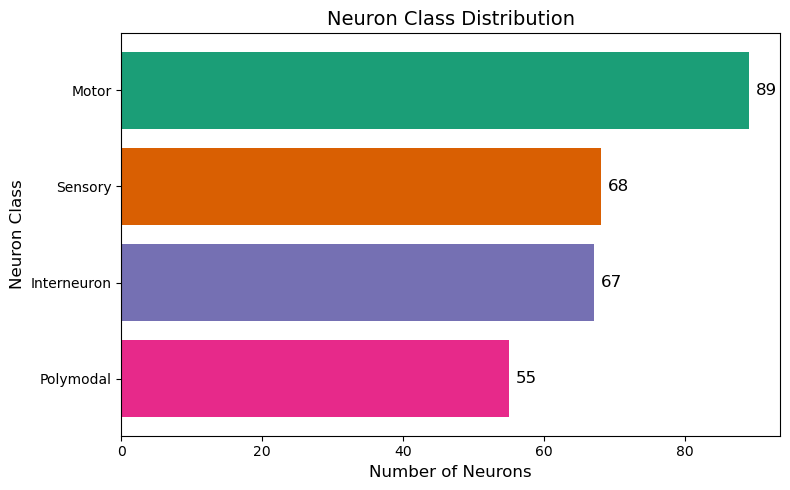

In [94]:
import matplotlib.pyplot as plt
from collections import Counter

# Count number of neurons per class
class_counts = Counter(classes)

# Sort by count (optional, for nicer ordering)
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Extract data
labels_bar = list(class_counts.keys())
counts_bar = list(class_counts.values())

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(labels_bar, counts_bar, color=[color_map[c] for c in labels_bar])

# Add numbers at the end of each bar
for bar, count in zip(bars, counts_bar):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontsize=12)

plt.xlabel("Number of Neurons", fontsize=12)
#plt.ylabel("Neuron Class", fontsize=12)
plt.title("Neuron Class Distribution", fontsize=14)
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()


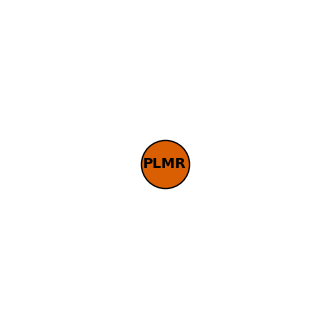

In [143]:
import matplotlib.pyplot as plt
import networkx as nx

# Example: single neuron
G = nx.DiGraph()

# Suppose this neuron has size = 120 (degree)
neuron_label = "PLMR"
neuron_size = 120  

G.add_node(0, label=neuron_label, size=neuron_size)

# Position (just center)
pos = {0: (0, 0)}

plt.figure(figsize=(4, 4))
nx.draw_networkx_nodes(G, pos, node_size=G.nodes[0]['size']*10, node_color=node_colors[146], edgecolors="black")
nx.draw_networkx_labels(G, pos, labels={0: G.nodes[0]['label']}, font_size=10, font_weight="bold")

plt.axis("off")
#plt.title("Single Neuron Schematic", fontsize=14)
plt.savefig("figures/neuron=PLMR.svg", dpi=600, bbox_inches="tight")
plt.show()
